# Никита Олтян. КомЗр 22-1м

In [ ]:
import cv2
import numpy as np

In [ ]:
def visualize(images_arr, names, figsize=(16,9)):
    if len(images_arr) > 1:
        fig, axs = plt.subplots(1, len(images_arr), figsize=figsize)
        for i, (image, name) in enumerate(zip(images_arr, names)):
            axs[i].imshow(image, cmap='gray')
            axs[i].title.set_text(name)
            axs[i].axis('off')
    else:
        fig, ax = plt.subplots(figsize=figsize)
        ax.imshow(images_arr[0], cmap='gray')
        ax.title.set_text(names[0])
        ax.axis('off')
    plt.show()

# Лабораторная №6 Классификация изображений

## Часть 1 алгоритмы

## Задание 1
Напишите функцию, которая принимает полутоновое изображение произвольного размера и ядро свертки на вход, а на выходе выдает результат свертки

In [ ]:
def Conv2D(image, kernel):
    # Применить свертку с заданным ядром
    result = cv2.filter2D(image, -1, kernel)
    return result

## Задание 2

Дополните функцию из задания 1 возможностью установить паддинг для обеспечения равных размерностей свертки и изображения и выполнить масштабирование входного изображения в диапазон (0,1).

In [ ]:
def Conv2D(image, kernel, padding=True, scale=True):
    if scale:
        # Масштабирование входного изображения в диапазон (0, 1)
        image = image.astype(np.float32) / 255.0

    if padding:
        # Вычислите размеры паддинга на основе размера ядра
        kernel_height, kernel_width = kernel.shape
        padding_height = kernel_height // 2
        padding_width = kernel_width // 2

        # Выполните паддинг входного изображения
        image = cv2.copyMakeBorder(image, padding_height, padding_height, padding_width, padding_width, cv2.BORDER_CONSTANT, value=0)

    # Примените свертку с заданным ядром
    result = cv2.filter2D(image, -1, kernel)
    return result

##Задание 3
Дополните функцию из задания 2 возможностью выполнить активацию результатов свертки с помощью ReLU или Sigmoid

In [ ]:
def Conv2D(image, kernel, padding=True, scale=True, activation=None):
    if scale:
        # Масштабирование входного изображения в диапазон (0, 1)
        image = image.astype(np.float32) / 255.0

    if padding:
        # Вычислите размеры паддинга на основе размера ядра
        kernel_height, kernel_width = kernel.shape
        padding_height = kernel_height // 2
        padding_width = kernel_width // 2

        # Выполните паддинг входного изображения
        image = cv2.copyMakeBorder(image, padding_height, padding_height, padding_width, padding_width, cv2.BORDER_CONSTANT, value=0)

    # Примените свертку с заданным ядром
    result = cv2.filter2D(image, -1, kernel)

    if activation == "relu":
        result = np.maximum(result, 0)
    elif activation == "sigmoid":
        result = 1 / (1 + np.exp(-result))

    return result

##Задание 4
Реализуйте функцию, которая на вход принимает результат свертки, размер ядра пулинга и тип пулинга (максимальный, минимальный, средний), а на выходе дает результат субдискретизации (пулинга) изображения

In [ ]:
def Pool2D(convolved_image, kernel_size, pooling_type="max"):
    height, width = convolved_image.shape
    kh, kw = kernel_size

    pooled_height = height // kh
    pooled_width = width // kw

    pooled_image = np.zeros((pooled_height, pooled_width), dtype=np.float32)

    for i in range(pooled_height):
        for j in range(pooled_width):
            # Выбор текущего окна
            window = convolved_image[i * kh:(i + 1) * kh, j * kw:(j + 1) * kw]

            if pooling_type == "max":
                pooled_image[i, j] = np.max(window)
            elif pooling_type == "min":
                pooled_image[i, j] = np.min(window)
            elif pooling_type == "average":
                pooled_image[i, j] = np.mean(window)

    return pooled_image

##Часть 2 Система распознавания в TensorFlow

##Задание 1
Загрузите датасет CIFAR-10 (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)





In [ ]:
from tensorflow import keras
from tensorflow.keras import utils
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

##Задание 2
Визуализируйте несколько изображений из разных классов

In [ ]:
def visualize(images_arr, names, figsize=(16,9)):
    if len(images_arr) > 1:
        fig, axs = plt.subplots(1, len(images_arr), figsize=figsize)
        for i, (image, name) in enumerate(zip(images_arr, names)):
            axs[i].imshow(image)
            axs[i].title.set_text(name)
            axs[i].axis('off')
    else:
        fig, ax = plt.subplots(figsize=figsize)
        ax.imshow(images_arr[0])
        ax.title.set_text(names[0])
        ax.axis('off')
    plt.show()

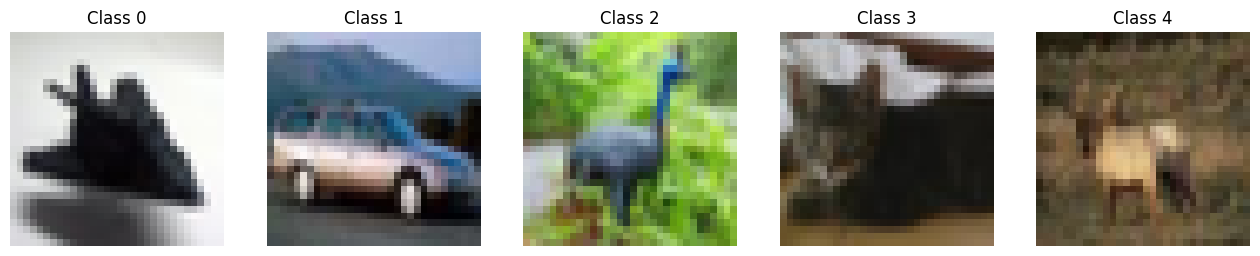

In [ ]:
images = []
names = []
for i in range(5):
    names.append(f'Class {i}')
    img_idx = np.where(y_train.argmax(axis=1) == i)[0][0]
    img = x_train[img_idx]
    images.append(img)

visualize(images, names)

##Задание 3

Сравните объемы обучающих и тестовых данных

In [ ]:
print('Train data:')
print(f'X train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print('\t')
print('Test data:')
print(f'X test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

Train data:
X train shape: (50000, 32, 32, 3)
y train shape: (50000, 10)
	
Test data:
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 10)


##Задание 4
Реализуйте обучение и оценку (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) простой модели машинного обучения из библиотеки ScikitLearn, например, классификатора на базе опорных векторов (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
def squeeze(data):
    squeezed_data = np.reshape(data, (data.shape[0], -1))
    return squeezed_data

def unsqueeze(data):
    nrow, ncol, ncolors = 32, 32, 3
    reshaped_data = data.reshape((data.shape[0], nrow, ncol, ncolors))
    return reshaped_data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train = squeeze(x_train)
x_test = squeeze(x_test)

In [ ]:
clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear")
)
clf.fit(x_train[:2000], y_train[:2000])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.39      0.33      1000
           1       0.41      0.35      0.38      1000
           2       0.21      0.27      0.24      1000
           3       0.21      0.24      0.22      1000
           4       0.23      0.29      0.26      1000
           5       0.23      0.18      0.20      1000
           6       0.34      0.29      0.31      1000
           7       0.40      0.27      0.32      1000
           8       0.40      0.42      0.41      1000
           9       0.40      0.30      0.34      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.30     10000
weighted avg       0.31      0.30      0.30     10000



##Задание 5
Используя фреймворк TensorFlow, постройте полносвязную ИНС (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) для классификации изображений CIFAR и обучите ее. Выполните оценку точности классификации.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
RESCALE = 1/255
VAL_SPLIT = 0.2

train_datagen = ImageDataGenerator(
    rescale=RESCALE,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    validation_split=VAL_SPLIT
)

test_datagen = ImageDataGenerator(
    rescale=RESCALE
)

# Fitting
train_datagen.fit(x_train)
test_datagen.fit(x_test)

In [ ]:
model_dense = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])


model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
EPOCHS = 10

train_datagen.fit(x_train)
model_dense.fit(
    train_datagen.flow(x_train, y_train, batch_size=64, subset='training'),
    validation_data=train_datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
    steps_per_epoch=len(x_train) / 128,
    epochs=EPOCHS
)

Epoch 1/10
390/390 [==============================] - 6s 12ms/step - loss: 1.8421 - accuracy: 0.3601 - val_loss: 1.6465 - val_accuracy: 0.4122
Epoch 2/10
390/390 [==============================] - 6s 15ms/step - loss: 1.6212 - accuracy: 0.4284 - val_loss: 1.5803 - val_accuracy: 0.4448
Epoch 3/10
390/390 [==============================] - 5s 12ms/step - loss: 1.5397 - accuracy: 0.4540 - val_loss: 1.5297 - val_accuracy: 0.4569
Epoch 4/10
390/390 [==============================] - 7s 17ms/step - loss: 1.4798 - accuracy: 0.4797 - val_loss: 1.5168 - val_accuracy: 0.4654
Epoch 5/10
390/390 [==============================] - 5s 12ms/step - loss: 1.4368 - accuracy: 0.4891 - val_loss: 1.4670 - val_accuracy: 0.4859
Epoch 6/10
390/390 [==============================] - 5s 14ms/step - loss: 1.3953 - accuracy: 0.5085 - val_loss: 1.4422 - val_accuracy: 0.4983
Epoch 7/10
390/390 [==============================] - 5s 12ms/step - loss: 1.3596 - accuracy: 0.5174 - val_loss: 1.4658 - val_accuracy: 0.4875

In [ ]:
y_pred = model_dense.predict(x_test)
y_pred_argmax = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
print(classification_report(y_test_argmax, y_pred_argmax))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.27      0.73      0.39      1000
           1       0.90      0.07      0.13      1000
           2       0.50      0.10      0.16      1000
           3       0.25      0.05      0.08      1000
           4       0.76      0.01      0.03      1000
           5       0.21      0.62      0.32      1000
           6       0.78      0.01      0.01      1000
           7       0.27      0.68      0.39      1000
           8       0.49      0.56      0.52      1000
           9       0.53      0.09      0.16      1000

    accuracy                           0.29     10000
   macro avg       0.50      0.29      0.22     10000
weighted avg       0.50      0.29      0.22     10000



##Задание 6
Используя фреймворк TensorFlow, постройте сверточную ИНС для классификации изображений CIFAR и обучите ее. Выполните оценку точности классификации.
Рекомендуется использовать сочетание слоев свертки (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) и пулинга (https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPooling2D или https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)  до 5 штук, а также исследовать слои нормализации пакетов (https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization).

In [ ]:
model_conv = Sequential([
    BatchNormalization(input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])


model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)       

In [ ]:
EPOCHS = 10

train_datagen.fit(x_train)
model_conv.fit(
    train_datagen.flow(x_train, y_train, batch_size=64, subset='training'),
    validation_data=train_datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
    steps_per_epoch=len(x_train) / 128,
    epochs=EPOCHS
)

Epoch 1/10
390/390 [==============================] - 21s 25ms/step - loss: 1.6637 - accuracy: 0.3751 - val_loss: 1.6895 - val_accuracy: 0.3935
Epoch 2/10
390/390 [==============================] - 9s 24ms/step - loss: 1.2553 - accuracy: 0.5533 - val_loss: 1.1363 - val_accuracy: 0.6033
Epoch 3/10
390/390 [==============================] - 10s 25ms/step - loss: 1.0497 - accuracy: 0.6310 - val_loss: 1.1682 - val_accuracy: 0.6276
Epoch 4/10
390/390 [==============================] - 9s 22ms/step - loss: 0.9191 - accuracy: 0.6784 - val_loss: 0.8719 - val_accuracy: 0.7021
Epoch 5/10
390/390 [==============================] - 9s 23ms/step - loss: 0.8391 - accuracy: 0.7119 - val_loss: 0.8350 - val_accuracy: 0.7187
Epoch 6/10
390/390 [==============================] - 11s 27ms/step - loss: 0.7653 - accuracy: 0.7364 - val_loss: 0.7747 - val_accuracy: 0.7324
Epoch 7/10
390/390 [==============================] - 10s 26ms/step - loss: 0.7117 - accuracy: 0.7606 - val_loss: 0.7103 - val_accuracy: 0.

In [ ]:
y_pred = model_conv.predict(x_test)
y_pred_argmax = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
print(classification_report(y_test_argmax, y_pred_argmax))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.13      0.96      0.23      1000
           1       0.62      0.43      0.51      1000
           2       0.40      0.00      0.00      1000
           3       0.33      0.01      0.01      1000
           4       0.00      0.00      0.00      1000
           5       0.91      0.05      0.09      1000
           6       0.00      0.00      0.00      1000
           7       0.50      0.38      0.43      1000
           8       0.62      0.21      0.31      1000
           9       0.55      0.36      0.44      1000

    accuracy                           0.24     10000
   macro avg       0.41      0.24      0.20     10000
weighted avg       0.41      0.24      0.20     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Задание 7
Визуализируйте несколько прогнозов разных моделей

1/1 [==============================] - 0s 17ms/step


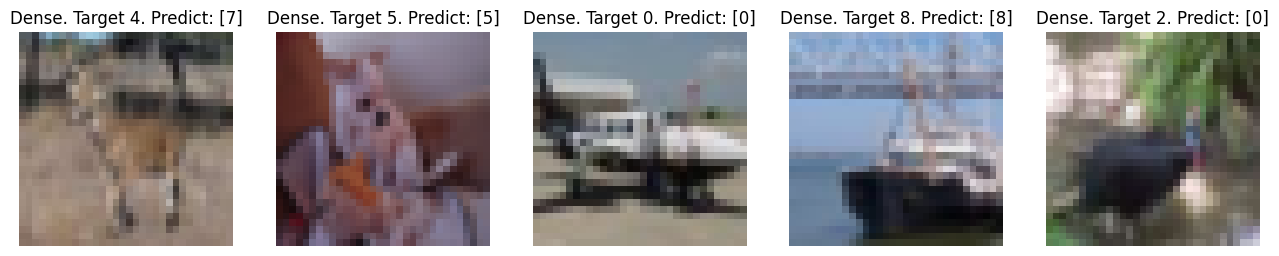

1/1 [==============================] - 0s 21ms/step


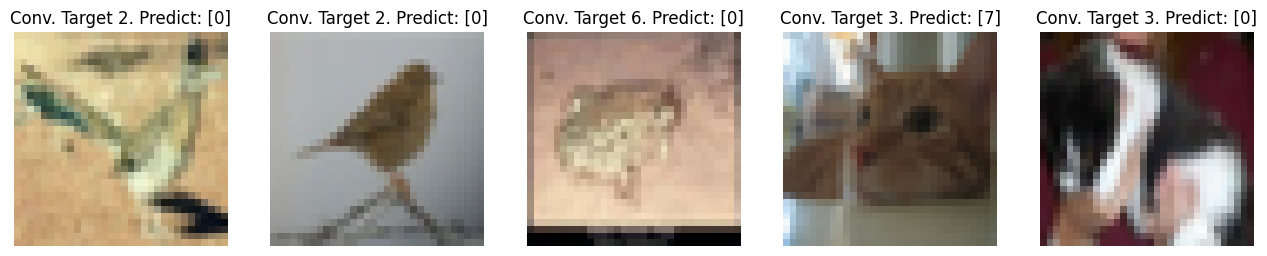

In [ ]:
images = []
names = []

for idx in np.random.randint(10000, size=5):
    img = x_test[idx]
    y_pred = model_dense.predict(np.array([img]))
    y_pred_argmax = np.argmax(y_pred, axis=1)
    y_test_argmax = np.argmax(y_test[idx])
    images.append(img)
    names.append(f'Dense. Target {y_test_argmax}. Predict: {y_pred_argmax}')

visualize(images, names)


images = []
names = []

for idx in np.random.randint(10000, size=5):
    img = x_test[idx]
    y_pred = model_conv.predict(np.array([img]))
    y_pred_argmax = np.argmax(y_pred, axis=1)
    y_test_argmax = np.argmax(y_test[idx])
    images.append(img)
    names.append(f'Conv. Target {y_test_argmax}. Predict: {y_pred_argmax}')

visualize(images, names)

##Задание 8**
Обучите модель трансферного обучения, например, VGG-19 (https://www.kaggle.com/code/givkashi/transfer-learning-vgg19) и выполните ее оценку

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from keras.metrics import Recall,Precision
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
base_model = VGG19(input_shape=(32, 32, 3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable=False

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
# Building Model
model_transfer = Sequential([
    base_model,
    Dropout(0.5),
    Flatten(),
    BatchNormalization(),
    Dense(512,kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
OPT = keras.optimizers.Adam(learning_rate=0.001)

model_transfer.compile(loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()],
              optimizer=OPT)

In [ ]:
filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 5, verbose = 1)
checkpoint    = ModelCheckpoint(filepath, monitor = 'val_accuracy', mode='max', save_best_only=True, verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
model_history = model_transfer.fit(train_datagen.flow(x_train, y_train, batch_size=64, subset='training'),
    validation_data=train_datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
    epochs = 10,
    callbacks = callback_list,
    verbose = 1)

Epoch 1/10
622/625 [============================>.] - ETA: 0s - loss: 1.4916 - accuracy: 0.4786 - precision: 0.6324 - recall: 0.3073
Epoch 1: val_accuracy improved from -inf to 0.59420, saving model to ./best_weights.hdf5
625/625 [==============================] - 23s 21ms/step - loss: 1.4917 - accuracy: 0.4787 - precision: 0.6326 - recall: 0.3074 - val_loss: 1.1702 - val_accuracy: 0.5942 - val_precision: 0.7513 - val_recall: 0.4094
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


622/625 [============================>.] - ETA: 0s - loss: 1.3487 - accuracy: 0.5219 - precision: 0.6642 - recall: 0.3512
Epoch 2: val_accuracy improved from 0.59420 to 0.60610, saving model to ./best_weights.hdf5
625/625 [==============================] - 13s 21ms/step - loss: 1.3486 - accuracy: 0.5220 - precision: 0.6644 - recall: 0.3512 - val_loss: 1.1370 - val_accuracy: 0.6061 - val_precision: 0.7606 - val_recall: 0.4178
Epoch 3/10
622/625 [============================>.] - ETA: 0s - loss: 1.3013 - accuracy: 0.5429 - precision: 0.6918 - recall: 0.3709
Epoch 3: val_accuracy improved from 0.60610 to 0.61290, saving model to ./best_weights.hdf5
625/625 [==============================] - 13s 20ms/step - loss: 1.3014 - accuracy: 0.5429 - precision: 0.6919 - recall: 0.3710 - val_loss: 1.1113 - val_accuracy: 0.6129 - val_precision: 0.7579 - val_recall: 0.4417
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 1.2692 - accuracy: 0.5529 - precision: 0.6990 - recall: 0.385

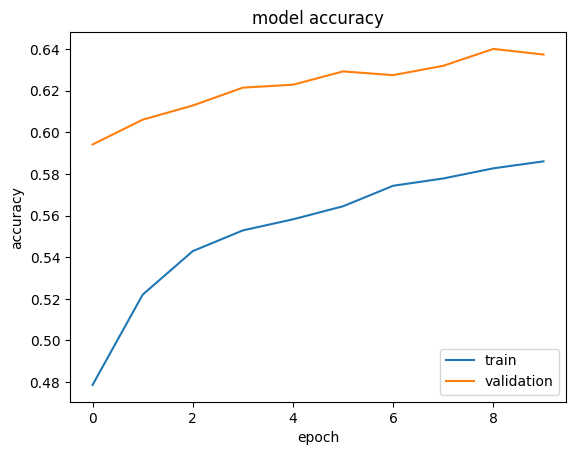

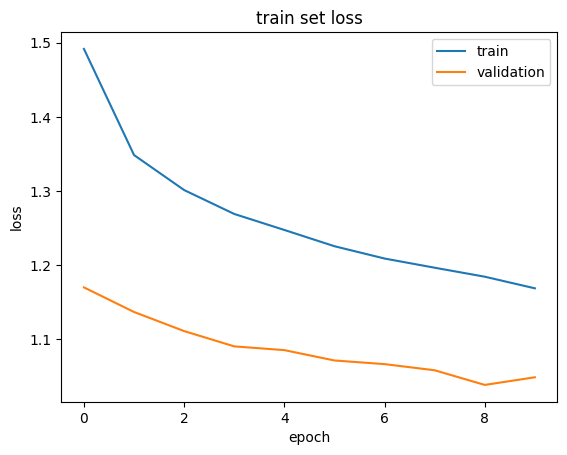

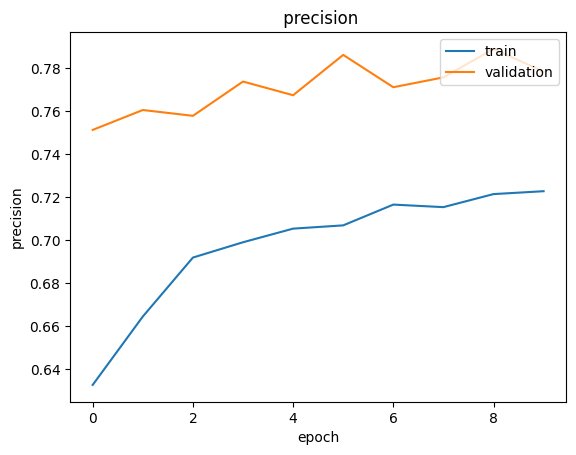

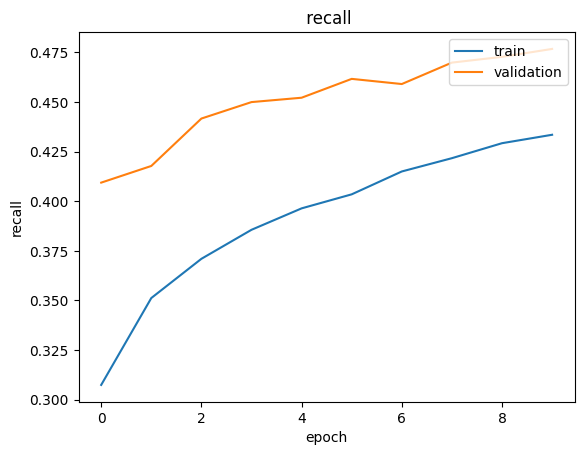

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('train set loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(model_history.history['precision'])
plt.plot(model_history.history['val_precision'])
plt.title(' precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.title(' recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Часть 3 Классификация изображений в PyTorch

##Задание 1
Используя фреймворк PyTorch (https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html) реализуйте полносвязную ИНС для классификации CIFAR-10. Выполните оценку точности модели после ее обучения.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

In [ ]:
# Гиперпараметры
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [ ]:
# Преобразования для загрузки данных и их нормализации
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:02<00:00, 70106268.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class FC_Net(nn.Module):
    def __init__(self):
        super(FC_Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
fc_net = FC_Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fc_net.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = fc_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

[1, 200] loss: 1.434
[1, 400] loss: 1.432
[1, 600] loss: 1.421
[2, 200] loss: 1.310
[2, 400] loss: 1.316
[2, 600] loss: 1.330
[3, 200] loss: 1.220
[3, 400] loss: 1.215
[3, 600] loss: 1.250
[4, 200] loss: 1.118
[4, 400] loss: 1.132
[4, 600] loss: 1.162
[5, 200] loss: 1.028
[5, 400] loss: 1.054
[5, 600] loss: 1.066


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = fc_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Точность сети на тестовых изображениях: {100 * correct / total:.2f}%')

Точность сети на тестовых изображениях: 53.56%


##Задание 2
Используя фреймворк PyTorch (https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html) реализуйте сверточную ИНС с пулингом для классификации CIFAR-10. Настройте слои нормализации и регуляризации DropOut. Выполните оценку точности модели после ее обучения.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
conv_net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_net.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.permute(0, 2, 3, 1)
        optimizer.zero_grad()
        outputs = conv_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

[1, 200] loss: 1.889
[1, 400] loss: 1.697
[1, 600] loss: 1.615
[2, 200] loss: 1.508
[2, 400] loss: 1.494
[2, 600] loss: 1.464
[3, 200] loss: 1.388
[3, 400] loss: 1.385
[3, 600] loss: 1.371
[4, 200] loss: 1.300
[4, 400] loss: 1.290
[4, 600] loss: 1.294
[5, 200] loss: 1.217
[5, 400] loss: 1.213
[5, 600] loss: 1.238


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.permute(0, 2, 3, 1)
        outputs = conv_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Точность сети на тестовых изображениях: {100 * correct / total:.2f}%')

Точность сети на тестовых изображениях: 54.12%


##Задание 3
Выведите несколько изображений и прогнозных лейблов для разных моделей.

In [ ]:
inputs, classes = next(iter(train_loader))

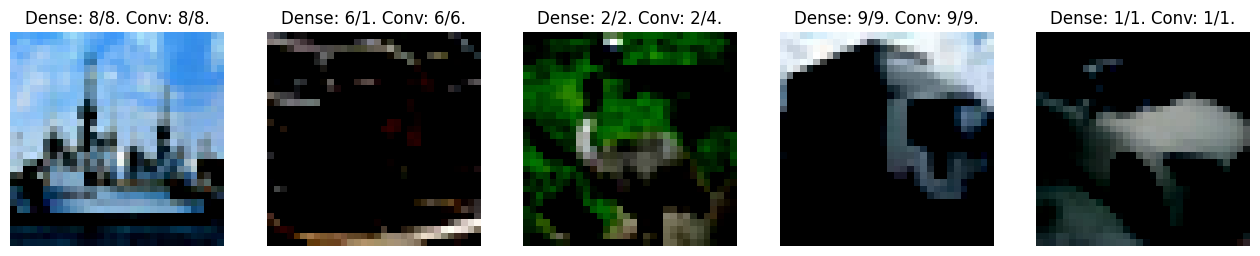

In [ ]:
images = []
names = []

pred_fc_net = fc_net(inputs).detach().numpy()
pred_fc_net = np.argmax(pred_fc_net, axis=1)

inputs_conv = inputs.permute(0, 2, 3, 1)
pred_conv_net = conv_net(inputs_conv).detach().numpy()
pred_conv_net = np.argmax(pred_conv_net, axis=1)

for idx in range(5, 10):
    img = np.transpose(inputs[idx], (1, 2, 0))
    images.append(img)
    names.append(f'Dense: {classes[idx]}/{pred_fc_net[idx]}. Conv: {classes[idx]}/{pred_conv_net[idx]}.')

visualize(images, names)

##Задание 4*
Выполните трансферное обучение в фреймворке PyTorch, например, для сети ResNet18 (https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html). Выполните оценку качества модели

In [ ]:
from torchvision import models

In [ ]:
batch_size = 64
learning_rate = 0.001
num_epochs = 10

transform = transforms.Compose([transforms.Resize((224, 224)),  # ResNet-18 ожидает 224x224 изображения
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 48100116.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
model_resnet = models.resnet18(pretrained=True)

for param in model_resnet.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.2MB/s]


In [ ]:
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.fc.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(2):
    model_resnet.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

In [ ]:
model_resnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Точность сети на тестовых изображениях: {100 * correct / total:.2f}%')

##Задание 5
Для каждого класса найдите изображение в Интернете и для каждой обученной ранее модели выведите результаты предсказаний.

In [ ]:
import skimage
import numpy as np
import cv2

In [ ]:
classes = [
  '0. airplane',
  '1. automobile',
  '2. bird',
  '3. cat',
  '4. deer',
  '5. dog',
  '6. frog',
  '7. horse',
  '8. ship',
  '9. truck'
]

URLs = [
    'https://w.forfun.com/fetch/f9/f9d82b3ed3bcdead03d1f6aa5895c6d6.jpeg',
    'https://krasivodel.ru/wp-content/uploads/2023/03/krasivodel.ru-552.jpg',
    'https://w.forfun.com/fetch/a2/a2b4c6bde2388a1cc8b872d683656080.jpeg',
    'https://i.pinimg.com/originals/67/e5/e2/67e5e258f7c982e6154271b92aa5a65f.jpg',
    'https://i.pinimg.com/originals/b8/62/b0/b862b0c4d489102d30e11281175fbb61.jpg',
    'https://w.forfun.com/fetch/bc/bc45d1305c40e2ec7d72c71080b34751.jpeg',
    'https://i.pinimg.com/originals/e0/32/0f/e0320f029dd77e6d54d376a05541e3f8.jpg',
    'https://wallpapercave.com/wp/wp8725798.jpg',
    'https://wallpapers.com/images/hd/ship-pictures-gv7dm1fmubp9hahr.jpg',
    'https://i.pinimg.com/originals/7f/88/46/7f8846d4538c837ec045a6e94a7d4a46.jpg'
]

In [ ]:
networks = [fc_net, conv_net, model_resnet]
networks_names = ['FC', 'Conv', 'ResNet']

for cls, url in zip(classes, URLs):
    image_rgb = skimage.io.imread(url)
    resized_img = cv2.resize(image_rgb, (32, 32))
    print(cls)

    images = [resized_img]
    names = [cls]
    for i, net in enumerate(networks):
        y_pred = net.predict(np.array([resized_img]))
        names.append(f'{networks_names[i]}. Target {cls}. Predict: {y_pred}')
    visualize(images, names)

#Выводы

In [ ]:
#ваши выводы